In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
train_loan = pd.read_csv('train_loan.csv')
test_loan = pd.read_csv('test_loan.csv')


In [174]:
# Train_loan test dataset

In [175]:
train_loan.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [176]:
train_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [177]:
train_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [178]:
# Pre-processing

# Handling missing values

In [179]:
train_loan.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [180]:
train_loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [181]:
# Missing values in 4 Object column and 3 Numerical column

# Numerical columns - mean/median
# Categorical - Mode

train_loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [182]:
train_loan['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [183]:
train_loan['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [184]:
train_loan['Gender'] = train_loan['Gender'].fillna('Male')

In [185]:
train_loan['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [186]:
x = train_loan['Married'].mode()
x

0    Yes
Name: Married, dtype: object

In [187]:
train_loan['Married'] = train_loan['Married'].fillna(x[0])

In [188]:
train_loan['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [189]:
train_loan['Dependents'] = train_loan['Dependents'].str.replace('+',"")

<ipython-input-189-2bb7ab0ee212>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train_loan['Dependents'] = train_loan['Dependents'].str.replace('+',"")


In [190]:
train_loan['Dependents'].median()

0.0

In [191]:
train_loan['Dependents'] = train_loan['Dependents'].fillna(train_loan['Dependents'].median())

In [192]:
train_loan['Dependents'] = train_loan['Dependents'].astype('int32')

In [193]:
train_loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [194]:
train_loan.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [195]:
train_loan['Self_Employed'] = train_loan['Self_Employed'].fillna(train_loan['Self_Employed'].mode())

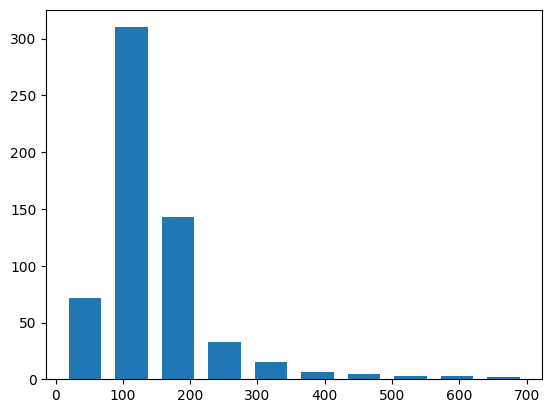

In [196]:
plt.hist(train_loan['LoanAmount'], rwidth=0.7)
plt.show()

In [197]:
train_loan['LoanAmount'] = train_loan['LoanAmount'].fillna(train_loan['LoanAmount'].mean())

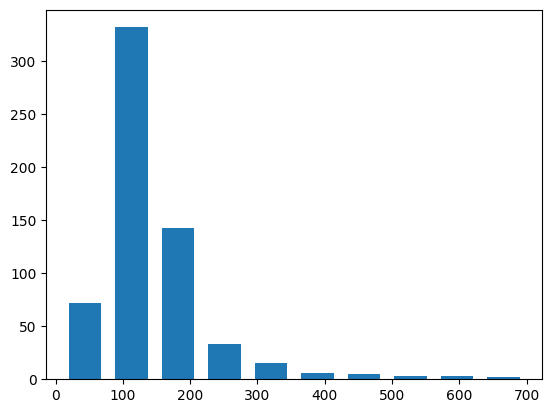

In [198]:
plt.hist(train_loan['LoanAmount'], rwidth=0.7)
plt.show()

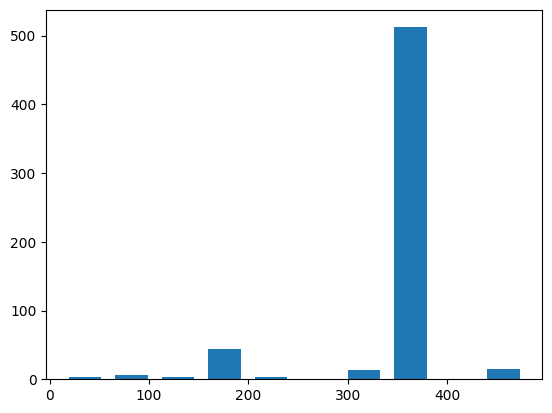

In [199]:
plt.hist(train_loan['Loan_Amount_Term'], rwidth=0.7)
plt.show()

In [200]:
train_loan['Loan_Amount_Term'] = train_loan['Loan_Amount_Term'].fillna(train_loan['Loan_Amount_Term'].median())

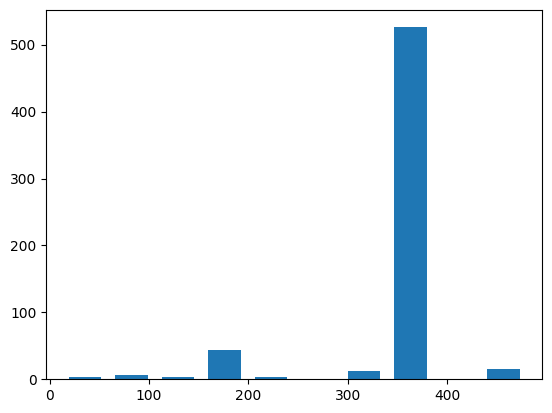

In [201]:
plt.hist(train_loan['Loan_Amount_Term'], rwidth=0.7)
plt.show()

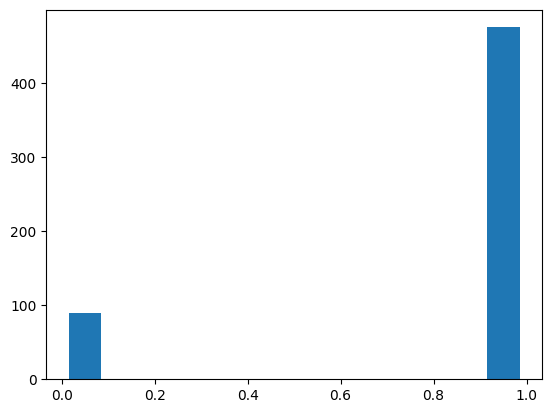

In [202]:
plt.hist(train_loan['Credit_History'], rwidth=0.7)
plt.show()

In [203]:
train_loan['Credit_History'] = train_loan['Credit_History'].fillna(train_loan['Credit_History'].median())

In [204]:
train_loan.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [205]:
train_loan['Self_Employed'].mode()

0    No
Name: Self_Employed, dtype: object

In [206]:
train_loan['Self_Employed'] = train_loan['Self_Employed'].fillna(train_loan['Self_Employed'].mode(0)[0])

In [207]:
train_loan.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [208]:
# Encoding
# Label Encoding for the target column i.e Loan_Status

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [209]:
train_loan['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [210]:
train_loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [211]:
train_loan['Loan_Status'] = le.fit_transform(train_loan['Loan_Status'])

In [212]:
train_loan['Loan_Status'].unique()

array([1, 0])

In [213]:
train_loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [214]:
train_loan.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,1
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,1
7,LP001014,Male,Yes,3,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,1
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,0


In [215]:
# OneHot Encoding

train_loan = pd.get_dummies(train_loan)

In [216]:
train_loan.head(10)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,...,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,146.412162,360.0,1.0,1,1,0,0,...,1,1,0,1,0,1,0,0,0,1
1,1,4583,1508.0,128.000000,360.0,1.0,0,0,1,0,...,1,0,1,1,0,1,0,1,0,0
2,0,3000,0.0,66.000000,360.0,1.0,1,0,0,1,...,1,0,1,1,0,0,1,0,0,1
3,0,2583,2358.0,120.000000,360.0,1.0,1,0,0,0,...,1,0,1,0,1,1,0,0,0,1
4,0,6000,0.0,141.000000,360.0,1.0,1,0,0,0,...,1,1,0,1,0,1,0,0,0,1
5,2,5417,4196.0,267.000000,360.0,1.0,1,0,0,0,...,1,0,1,1,0,0,1,0,0,1
6,0,2333,1516.0,95.000000,360.0,1.0,1,0,0,0,...,1,0,1,0,1,1,0,0,0,1
7,3,3036,2504.0,158.000000,360.0,0.0,0,0,0,0,...,1,0,1,1,0,1,0,0,1,0
8,2,4006,1526.0,168.000000,360.0,1.0,1,0,0,0,...,1,0,1,1,0,1,0,0,0,1
9,1,12841,10968.0,349.000000,360.0,1.0,0,0,0,0,...,1,0,1,1,0,1,0,0,1,0


In [217]:
train_loan.dtypes

Dependents                   int32
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
                            ...   
Self_Employed_No             uint8
Self_Employed_Yes            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
Length: 632, dtype: object

In [218]:
# Scaling

# In our case train_loan['Loan_Status'] is a dependent feature while all other columns are independent features

# We do not do feature scaling for target column, this is especially dangerous in the case of regression models where the target column if scaled leads to incorrect information to model
# Feature scaling only in independent features and non-target columns


In [219]:
x = train_loan.drop('Loan_Status', axis=1)  # Independent Features
y = train_loan['Loan_Status'] # Dependent feature

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

x

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,...,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,...,1,1,0,1,0,1,0,0,0,1
1,1,4583,1508.0,128.000000,360.0,1.0,0,1,0,0,...,1,0,1,1,0,1,0,1,0,0
2,0,3000,0.0,66.000000,360.0,1.0,0,0,1,0,...,1,0,1,1,0,0,1,0,0,1
3,0,2583,2358.0,120.000000,360.0,1.0,0,0,0,1,...,1,0,1,0,1,1,0,0,0,1
4,0,6000,0.0,141.000000,360.0,1.0,0,0,0,0,...,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.000000,360.0,1.0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
610,3,4106,0.0,40.000000,180.0,1.0,0,0,0,0,...,1,0,1,1,0,1,0,1,0,0
611,1,8072,240.0,253.000000,360.0,1.0,0,0,0,0,...,1,0,1,1,0,1,0,0,0,1
612,2,7583,0.0,187.000000,360.0,1.0,0,0,0,0,...,1,0,1,1,0,1,0,0,0,1


In [220]:
x.loc[:,['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',	'Loan_Amount_Term' ]] = minmax.fit_transform(x[['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',	'Loan_Amount_Term']])


In [221]:
x.head(10)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,...,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.000000,0.070489,0.000000,0.198860,0.74359,1.0,1,0,0,0,...,1,1,0,1,0,1,0,0,0,1
1,0.333333,0.054830,0.036192,0.172214,0.74359,1.0,0,1,0,0,...,1,0,1,1,0,1,0,1,0,0
2,0.000000,0.035250,0.000000,0.082489,0.74359,1.0,0,0,1,0,...,1,0,1,1,0,0,1,0,0,1
3,0.000000,0.030093,0.056592,0.160637,0.74359,1.0,0,0,0,1,...,1,0,1,0,1,1,0,0,0,1
4,0.000000,0.072356,0.000000,0.191027,0.74359,1.0,0,0,0,0,...,1,1,0,1,0,1,0,0,0,1
5,0.666667,0.065145,0.100703,0.373372,0.74359,1.0,0,0,0,0,...,1,0,1,1,0,0,1,0,0,1
6,0.000000,0.027001,0.036384,0.124457,0.74359,1.0,0,0,0,0,...,1,0,1,0,1,1,0,0,0,1
7,1.000000,0.035696,0.060096,0.215630,0.74359,0.0,0,0,0,0,...,1,0,1,1,0,1,0,0,1,0
8,0.666667,0.047693,0.036624,0.230101,0.74359,1.0,0,0,0,0,...,1,0,1,1,0,1,0,0,0,1
9,0.333333,0.156970,0.263230,0.492041,0.74359,1.0,0,0,0,0,...,1,0,1,1,0,1,0,0,1,0


In [290]:
train_loan

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,...,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849.0,0.0,146.412162,360.0,1.0,1,1,0,0,...,1,1,0,1,0,1,0,0,0,1
1,1,4583.0,1508.0,128.000000,360.0,1.0,0,0,1,0,...,1,0,1,1,0,1,0,1,0,0
2,0,3000.0,0.0,66.000000,360.0,1.0,1,0,0,1,...,1,0,1,1,0,0,1,0,0,1
3,0,2583.0,2358.0,120.000000,360.0,1.0,1,0,0,0,...,1,0,1,0,1,1,0,0,0,1
4,0,6000.0,0.0,141.000000,360.0,1.0,1,0,0,0,...,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,0,3232.0,1950.0,108.000000,360.0,1.0,1,0,0,0,...,1,0,1,1,0,1,0,1,0,0
609,0,2900.0,0.0,71.000000,360.0,1.0,1,0,0,0,...,0,1,0,1,0,1,0,1,0,0
610,3,4106.0,0.0,40.000000,180.0,1.0,1,0,0,0,...,1,0,1,1,0,1,0,1,0,0
612,2,7583.0,0.0,187.000000,360.0,1.0,1,0,0,0,...,1,0,1,1,0,1,0,0,0,1


In [222]:
# Outliers

train_loan.dtypes

Dependents                   int32
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
                            ...   
Self_Employed_No             uint8
Self_Employed_Yes            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
Length: 632, dtype: object

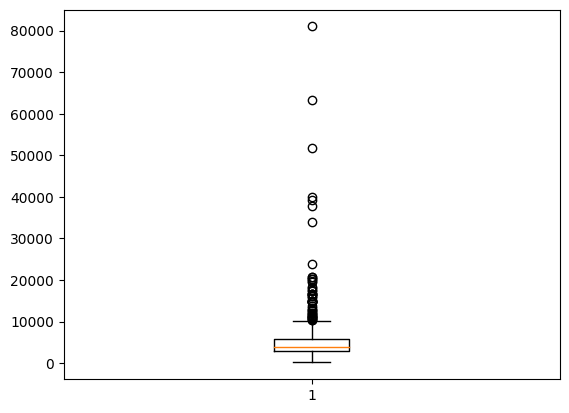

In [223]:
plt.boxplot(train_loan['ApplicantIncome'])
plt.show()

In [224]:
Q1 = train_loan['ApplicantIncome'].quantile(0.25)
Q2 = train_loan['ApplicantIncome'].quantile(0.50)
Q3 = train_loan['ApplicantIncome'].quantile(0.75)

In [225]:
IQR = Q3-Q1
low = Q1 - (1.5*IQR)
high = Q3 + (1.5*IQR)
print(low,high)

-1498.75 10171.25


In [226]:
train_loan[(train_loan['ApplicantIncome'] < low) | (train_loan['ApplicantIncome'] > high)].index

Int64Index([  9,  34,  54,  67, 102, 106, 115, 119, 126, 128, 130, 138, 144,
            146, 155, 171, 183, 185, 191, 199, 254, 258, 271, 278, 284, 308,
            324, 333, 369, 370, 409, 424, 432, 438, 443, 467, 475, 478, 483,
            487, 493, 506, 509, 525, 533, 534, 561, 572, 594, 604],
           dtype='int64')

In [227]:
i=0
count=0
outliers=[]
for i in train_loan['ApplicantIncome']:
  if (i<low) | (i>high):
    outliers.append(count)
    count = count + 1
  else:
    count = count + 1

print(np.array(outliers))

[  9  34  54  67 102 106 115 119 126 128 130 138 144 146 155 171 183 185
 191 199 254 258 271 278 284 308 324 333 369 370 409 424 432 438 443 467
 475 478 483 487 493 506 509 525 533 534 561 572 594 604]


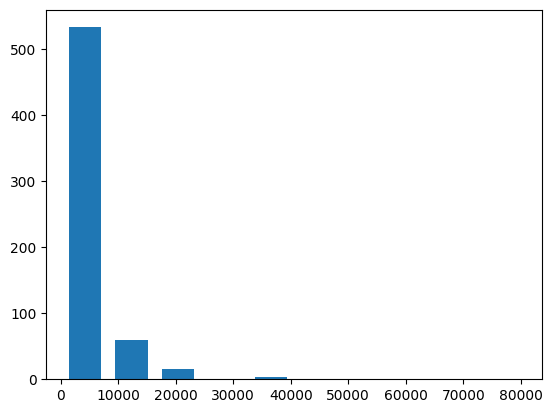

In [228]:
plt.hist(train_loan['ApplicantIncome'], rwidth=0.7)
plt.show()

In [229]:
train_loan['ApplicantIncome'][outliers] = train_loan['ApplicantIncome'].median(0)

<ipython-input-229-fe3b29fc90bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_loan['ApplicantIncome'][outliers] = train_loan['ApplicantIncome'].median(0)


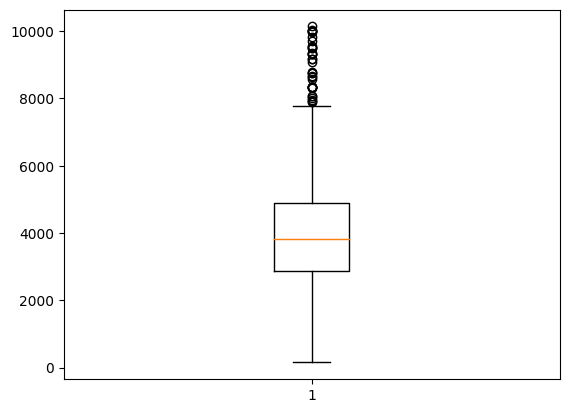

In [230]:
plt.boxplot(train_loan['ApplicantIncome'])
plt.show()

In [231]:
Q1 = train_loan['ApplicantIncome'].quantile(0.25)
Q2 = train_loan['ApplicantIncome'].quantile(0.50)
Q3 = train_loan['ApplicantIncome'].quantile(0.75)

IQR = Q3-Q1
low = Q1 - (1.5*IQR)
high = Q3 + (1.5*IQR)
print(low,high)

-126.25 7883.75


In [232]:
train_loan[(train_loan['ApplicantIncome'] < low) | (train_loan['ApplicantIncome'] > high)].index

Int64Index([ 25,  58,  88, 148, 152, 157, 161, 164, 169, 189, 196, 210, 233,
            246, 289, 319, 325, 334, 350, 351, 356, 372, 376, 390, 391, 408,
            430, 435, 441, 459, 484, 523, 557, 564, 592, 598, 611],
           dtype='int64')

In [233]:
train_loan.drop([25,  58,  88, 148, 152, 157, 161, 164, 169, 189, 196, 210, 233,
            246, 289, 319, 325, 334, 350, 351, 356, 372, 376, 390, 391, 408,
            430, 435, 441, 459, 484, 523, 557, 564, 592, 598, 611], inplace=True)

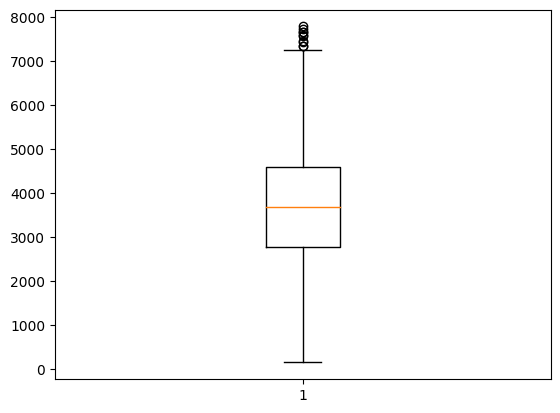

In [234]:
plt.boxplot(train_loan['ApplicantIncome'])
plt.show()

In [235]:
train_loan.head(10)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,...,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849.0,0.0,146.412162,360.0,1.0,1,1,0,0,...,1,1,0,1,0,1,0,0,0,1
1,1,4583.0,1508.0,128.000000,360.0,1.0,0,0,1,0,...,1,0,1,1,0,1,0,1,0,0
2,0,3000.0,0.0,66.000000,360.0,1.0,1,0,0,1,...,1,0,1,1,0,0,1,0,0,1
3,0,2583.0,2358.0,120.000000,360.0,1.0,1,0,0,0,...,1,0,1,0,1,1,0,0,0,1
4,0,6000.0,0.0,141.000000,360.0,1.0,1,0,0,0,...,1,1,0,1,0,1,0,0,0,1
5,2,5417.0,4196.0,267.000000,360.0,1.0,1,0,0,0,...,1,0,1,1,0,0,1,0,0,1
6,0,2333.0,1516.0,95.000000,360.0,1.0,1,0,0,0,...,1,0,1,0,1,1,0,0,0,1
7,3,3036.0,2504.0,158.000000,360.0,0.0,0,0,0,0,...,1,0,1,1,0,1,0,0,1,0
8,2,4006.0,1526.0,168.000000,360.0,1.0,1,0,0,0,...,1,0,1,1,0,1,0,0,0,1
9,1,3812.5,10968.0,349.000000,360.0,1.0,0,0,0,0,...,1,0,1,1,0,1,0,0,1,0


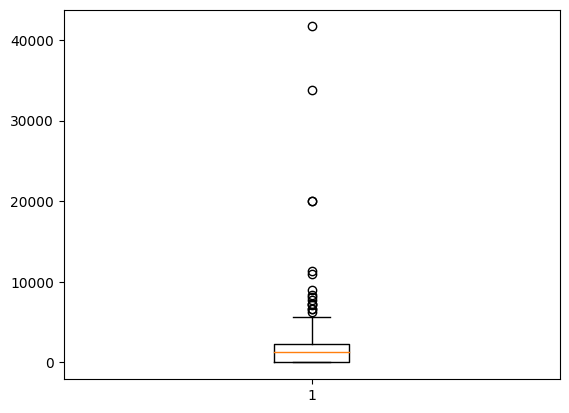

In [236]:
plt.boxplot(train_loan['CoapplicantIncome'])
plt.show()

In [237]:
Q1 = train_loan['CoapplicantIncome'].quantile(0.25)
Q2 = train_loan['CoapplicantIncome'].quantile(0.50)
Q3 = train_loan['CoapplicantIncome'].quantile(0.75)

IQR = Q3-Q1
low = Q1 - (1.5*IQR)
high = Q3 + (1.5*IQR)
print(low,high)

-3495.0 5825.0


In [238]:
train_loan[(train_loan['CoapplicantIncome'] < low) | (train_loan['CoapplicantIncome'] > high)].index

Int64Index([9, 12, 38, 122, 135, 177, 180, 253, 349, 402, 417, 444, 506, 513,
            581, 600],
           dtype='int64')

In [239]:
train_loan.drop([9, 12, 38, 122, 135, 177, 180, 253, 349, 402, 417, 444, 506, 513,
            581, 600], inplace = True)

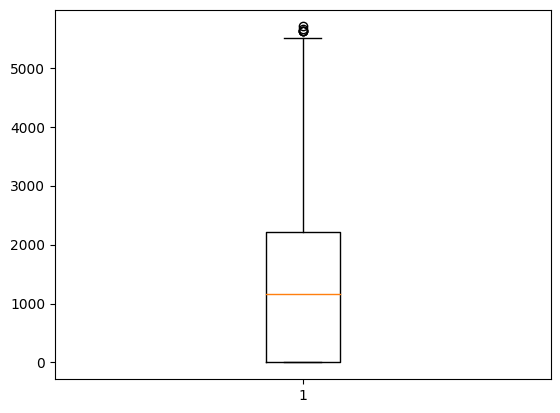

In [240]:
plt.boxplot(train_loan['CoapplicantIncome'])
plt.show()

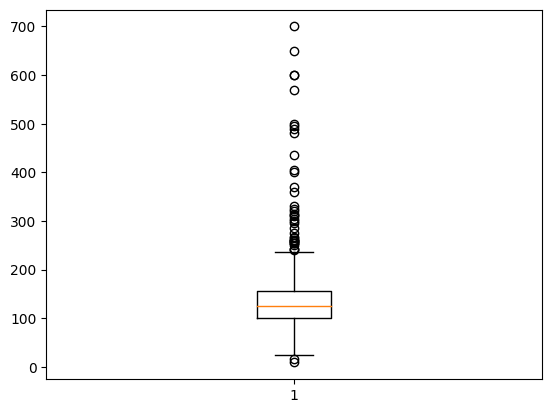

In [241]:
plt.boxplot(train_loan['LoanAmount'])
plt.show()

In [242]:
Q1 = train_loan['LoanAmount'].quantile(0.25)
Q2 = train_loan['LoanAmount'].quantile(0.50)
Q3 = train_loan['LoanAmount'].quantile(0.75)

IQR = Q3-Q1
low = Q1 - (1.5*IQR)
high = Q3 + (1.5*IQR)
print(low,high)

17.5 237.5


In [243]:
train_loan[(train_loan['LoanAmount'] < low) | (train_loan['LoanAmount'] > high)].index

Int64Index([  5,  14,  21,  34,  54,  65,  67,  83, 119, 126, 130, 138, 155,
            159, 171, 183, 212, 236, 255, 258, 260, 278, 308, 324, 333, 348,
            369, 381, 409, 432, 487, 505, 511, 514, 525, 536, 561, 568, 572,
            594, 604],
           dtype='int64')

In [244]:
train_loan.drop([ 5,  14,  21,  34,  54,  65,  67,  83, 119, 126, 130, 138, 155,
            159, 171, 183, 212, 236, 255, 258, 260, 278, 308, 324, 333, 348,
            369, 381, 409, 432, 487, 505, 511, 514, 525, 536, 561, 568, 572,
            594, 604], inplace = True)

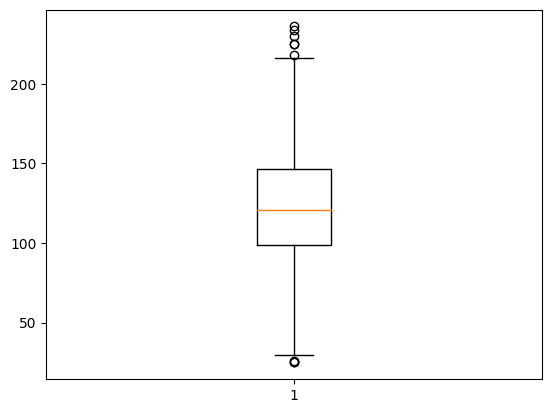

In [245]:
plt.boxplot(train_loan['LoanAmount'])
plt.show()

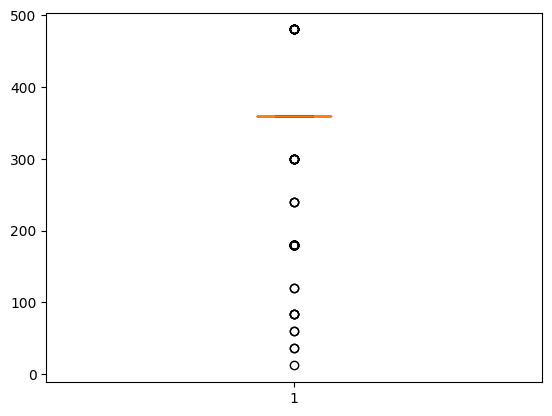

In [246]:
plt.boxplot(train_loan['Loan_Amount_Term'])
plt.show()

In [247]:
Q1 = train_loan['Loan_Amount_Term'].quantile(0.25)
Q2 = train_loan['Loan_Amount_Term'].quantile(0.50)
Q3 = train_loan['Loan_Amount_Term'].quantile(0.75)

IQR = Q3-Q1
low = Q1 - (1.5*IQR)
high = Q3 + (1.5*IQR)
print(low,high)

360.0 360.0


In [248]:
# Outliers have been handled in the case of 'LoanAmount', 'CoapplicantIncome', 'ApplicantIncome'
# Outliers can't be handled in case of 'Loan_Amount_Term as low and high are same

In [249]:
# test_loan test dataset


In [250]:
test_loan = pd.read_csv('test_loan.csv')

In [251]:
test_loan.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [252]:
test_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [253]:
test_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [254]:
# Pre-processing

# Handling missing values

In [255]:
test_loan.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [256]:
test_loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [257]:
# Missing values in 3 Object columns and 3 Numerical columns

# Numerical columns - mean/median
# Categorical - Mode
test_loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [258]:
test_loan['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [259]:
test_loan['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [260]:
test_loan['Gender'] = test_loan['Gender'].fillna('Male')

In [261]:
test_loan['Married'].unique()

array(['Yes', 'No'], dtype=object)

In [262]:
test_loan['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [263]:
test_loan['Dependents'] = test_loan['Dependents'].str.replace('+',"")

<ipython-input-263-1338e9aa9e1d>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test_loan['Dependents'] = test_loan['Dependents'].str.replace('+',"")


In [264]:
test_loan['Dependents'].median()

0.0

In [265]:
test_loan['Dependents'] = test_loan['Dependents'].fillna(test_loan['Dependents'].median())

In [266]:
test_loan['Dependents'] = test_loan['Dependents'].astype('int32')

In [267]:
test_loan['Self_Employed'] = test_loan['Self_Employed'].fillna(test_loan['Self_Employed'].mode(0)[0])

In [268]:
# Numerical Column Missing values

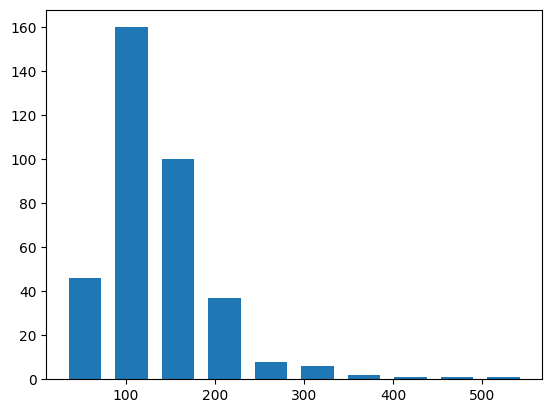

In [269]:
plt.hist(test_loan['LoanAmount'], rwidth=0.7)
plt.show()

In [270]:
test_loan['LoanAmount'] = test_loan['LoanAmount'].fillna(test_loan['LoanAmount'].median())

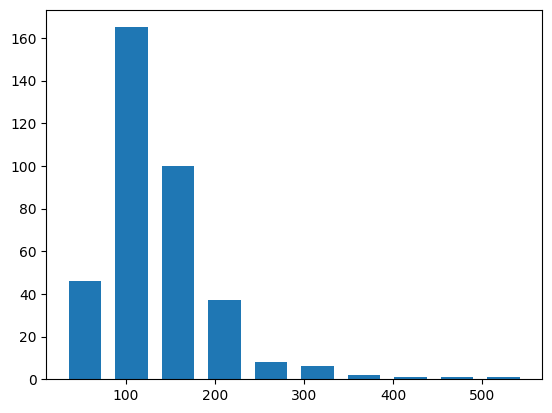

In [271]:
plt.hist(test_loan['LoanAmount'], rwidth=0.7)
plt.show()

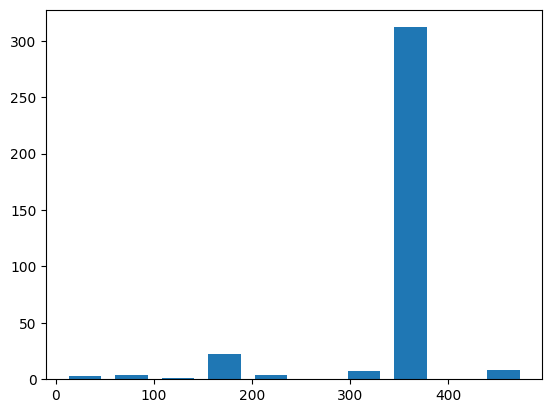

In [272]:
plt.hist(test_loan['Loan_Amount_Term'], rwidth=0.7)
plt.show()

In [273]:
test_loan['Loan_Amount_Term'] = test_loan['Loan_Amount_Term'].fillna(test_loan['Loan_Amount_Term'].median())

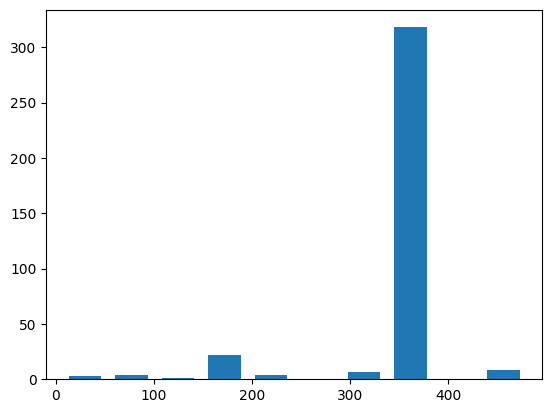

In [274]:
plt.hist(test_loan['Loan_Amount_Term'], rwidth=0.7)
plt.show()

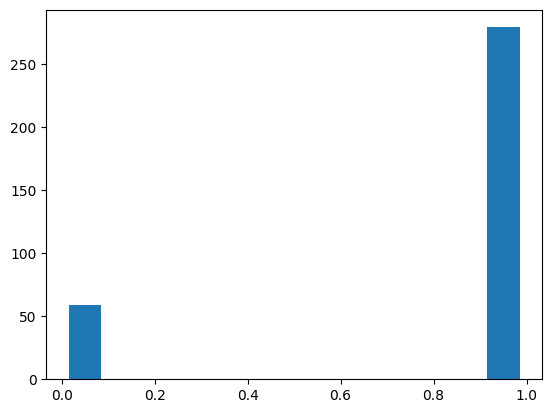

In [275]:
plt.hist(test_loan['Credit_History'], rwidth=0.7)
plt.show()

In [276]:
test_loan['Credit_History'] = test_loan['Credit_History'].fillna(test_loan['Credit_History'].median())

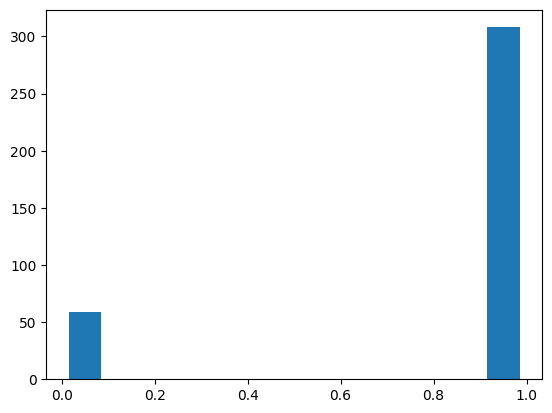

In [277]:
plt.hist(test_loan['Credit_History'], rwidth=0.7)
plt.show()

In [278]:
test_loan.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [279]:
test_loan.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,No,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [280]:
# Label Encoding is not possible here as we are unable to find target column
# We can however do one hot encoding

In [281]:
# one hot encoding

In [282]:
y = test_loan['Loan_ID']
test_loan = pd.get_dummies(test_loan.drop('Loan_ID', axis=1))
test_loan['Loan_ID'] = y

In [291]:
test_loan.head(10)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_ID
0,0,5720,0,110.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1,LP001015
1,1,3076,1500,126.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1,LP001022
2,2,5000,1800,208.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1,LP001031
3,2,2340,2546,100.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1,LP001035
4,0,3276,0,78.0,360.0,1.0,0,1,1,0,0,1,1,0,0,0,1,LP001051
5,0,2165,3422,152.0,360.0,1.0,0,1,0,1,0,1,0,1,0,0,1,LP001054
6,1,2226,0,59.0,360.0,1.0,1,0,1,0,0,1,1,0,0,1,0,LP001055
7,2,3881,0,147.0,360.0,0.0,0,1,0,1,0,1,1,0,1,0,0,LP001056
8,2,13633,0,280.0,240.0,1.0,0,1,0,1,1,0,1,0,0,0,1,LP001059
9,0,2400,2400,123.0,360.0,1.0,0,1,1,0,0,1,1,0,0,1,0,LP001067


In [284]:
test_loan.dtypes

Dependents                   int32
ApplicantIncome              int64
CoapplicantIncome            int64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Gender_Female                uint8
Gender_Male                  uint8
Married_No                   uint8
Married_Yes                  uint8
Education_Graduate           uint8
Education_Not Graduate       uint8
Self_Employed_No             uint8
Self_Employed_Yes            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
Loan_ID                     object
dtype: object

In [116]:
# Scaling

# We do not do feature scaling for target column, this is especially dangerous in the case of regression models where the target column if scaled leads to incorrect information to model
# Feature scaling only in independent features and non-target columns

In [285]:
x = test_loan.copy()

from sklearn.preprocessing import StandardScaler

In [286]:
sc = StandardScaler()

In [287]:
x.loc[:,['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',	'Loan_Amount_Term' ]] = sc.fit_transform(x[['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',	'Loan_Amount_Term']])

In [288]:
x.head(10)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_ID
0,-0.758222,0.186461,-0.673335,-0.426780,0.266022,1.0,0,1,0,1,1,0,1,0,0,0,1,LP001015
1,0.181871,-0.352692,-0.029848,-0.163953,0.266022,1.0,0,1,0,1,1,0,1,0,0,0,1,LP001022
2,1.121964,0.039641,0.098849,1.183033,0.266022,1.0,0,1,0,1,1,0,1,0,0,0,1,LP001031
3,1.121964,-0.502774,0.418877,-0.591047,0.266022,1.0,0,1,0,1,1,0,1,0,0,0,1,LP001035
4,-0.758222,-0.311909,-0.673335,-0.952433,0.266022,1.0,0,1,1,0,0,1,1,0,0,0,1,LP001051
5,-0.758222,-0.538459,0.794673,0.263140,0.266022,1.0,0,1,0,1,0,1,0,1,0,0,1,LP001054
6,0.181871,-0.526020,-0.673335,-1.264540,0.266022,1.0,1,0,1,0,0,1,1,0,0,1,0,LP001055
7,1.121964,-0.188540,-0.673335,0.181007,0.266022,0.0,0,1,0,1,0,1,1,0,1,0,0,LP001056
8,1.121964,1.800044,-0.673335,2.365753,-1.592419,1.0,0,1,0,1,1,0,1,0,0,0,1,LP001059
9,-0.758222,-0.490539,0.356244,-0.213233,0.266022,1.0,0,1,1,0,0,1,1,0,0,1,0,LP001067


In [121]:
# Outliers - Outliers are viewed with the help of boxplot and taken care of with either
# (flooring and capping) or (dropping) the outliers
# If there are too many outliers to be dropped, we go for flooring and capping



In [295]:
test_loan.head(10)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_ID
0,0,5720,0,110.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1,LP001015
1,1,3076,1500,126.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1,LP001022
2,2,5000,1800,208.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1,LP001031
3,2,2340,2546,100.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1,LP001035
4,0,3276,0,78.0,360.0,1.0,0,1,1,0,0,1,1,0,0,0,1,LP001051
5,0,2165,3422,152.0,360.0,1.0,0,1,0,1,0,1,0,1,0,0,1,LP001054
6,1,2226,0,59.0,360.0,1.0,1,0,1,0,0,1,1,0,0,1,0,LP001055
7,2,3881,0,147.0,360.0,0.0,0,1,0,1,0,1,1,0,1,0,0,LP001056
8,2,13633,0,280.0,240.0,1.0,0,1,0,1,1,0,1,0,0,0,1,LP001059
9,0,2400,2400,123.0,360.0,1.0,0,1,1,0,0,1,1,0,0,1,0,LP001067


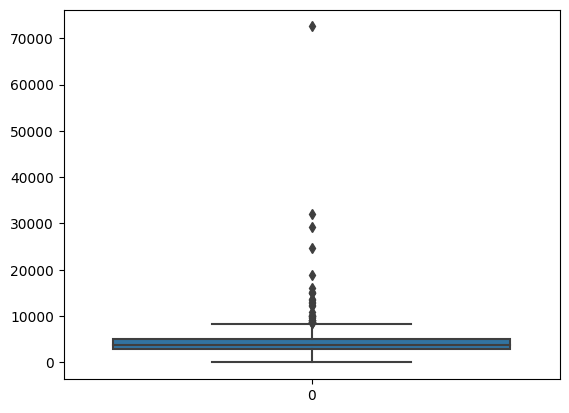

In [296]:
sns.boxplot(test_loan['ApplicantIncome'])
plt.show()

In [297]:
upper_limit = test_loan['ApplicantIncome'].quantile(0.99)
lower_limit = test_loan['ApplicantIncome'].quantile(0.01)
print(upper_limit, lower_limit)

20865.379999999852 999.22


In [301]:
new_test_loan = test_loan[(test_loan['ApplicantIncome'] <= upper_limit) & (test_loan['ApplicantIncome'] >= lower_limit)]

<ipython-input-302-b2532d2cd32a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_test_loan['ApplicantIncome'])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

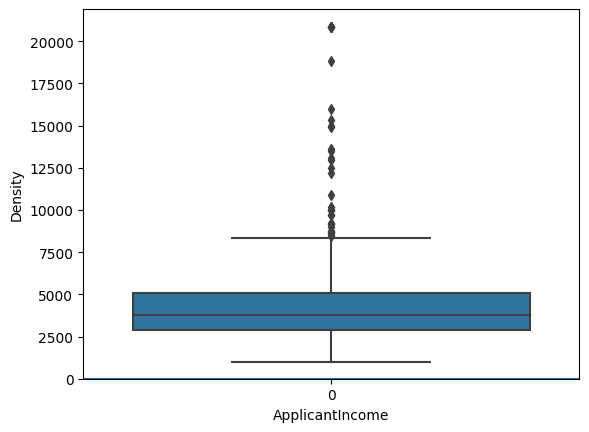

In [302]:
sns.distplot(new_test_loan['ApplicantIncome'])
sns.boxplot(new_test_loan['ApplicantIncome'])

In [303]:
test_loan['ApplicantIncome'] = np.where(test_loan['ApplicantIncome'] >= upper_limit,
        upper_limit,
        np.where(test_loan['ApplicantIncome'] <= lower_limit,
        lower_limit,test_loan['ApplicantIncome']))

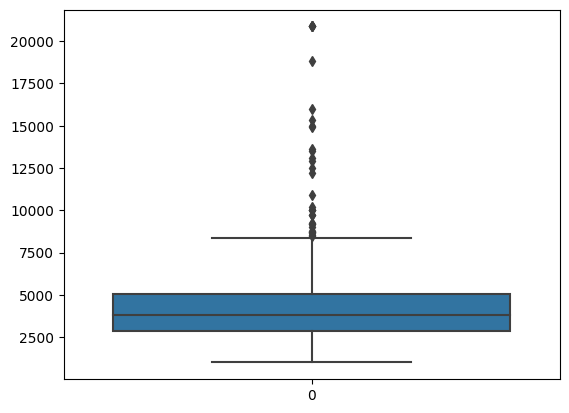

In [304]:
sns.boxplot(test_loan['ApplicantIncome'])
plt.show()

<ipython-input-294-b5c4ef5b7e76>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_loan['CoapplicantIncome'])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

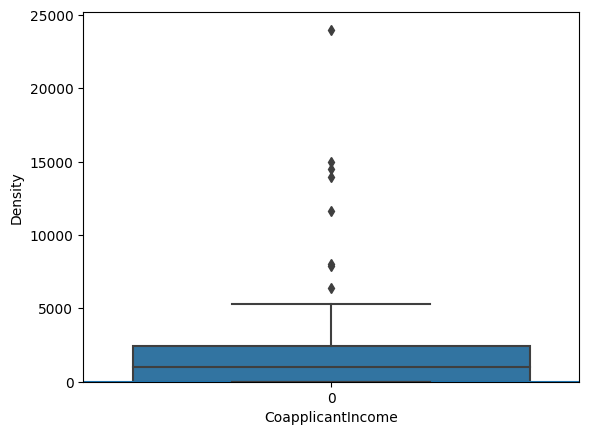

In [294]:
sns.distplot(test_loan['CoapplicantIncome'])
sns.boxplot(test_loan['CoapplicantIncome'])


In [305]:
upper_limit = test_loan['CoapplicantIncome'].quantile(0.99)
lower_limit = test_loan['CoapplicantIncome'].quantile(0.01)
print(upper_limit, lower_limit)

12453.779999999942 0.0


In [306]:
new_test_loan = test_loan[(test_loan['CoapplicantIncome'] <= upper_limit) & (test_loan['CoapplicantIncome'] >= lower_limit)]

<ipython-input-308-a0ece7e49e50>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_test_loan['CoapplicantIncome'])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

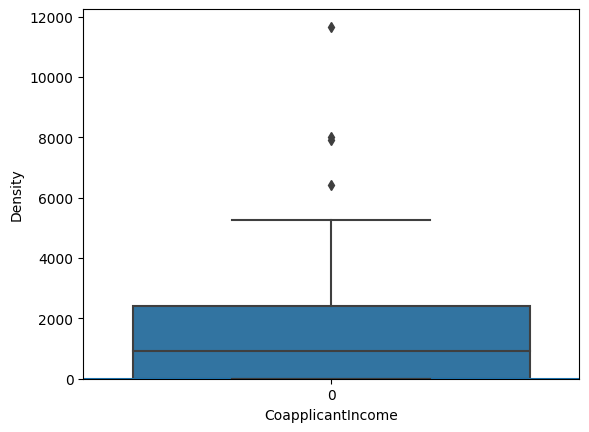

In [308]:
sns.distplot(new_test_loan['CoapplicantIncome'])
sns.boxplot(new_test_loan['CoapplicantIncome'])

In [309]:
test_loan['CoapplicantIncome'] = np.where(test_loan['CoapplicantIncome'] >= upper_limit,
        upper_limit,
        np.where(test_loan['CoapplicantIncome'] <= lower_limit,
        lower_limit,test_loan['CoapplicantIncome']))

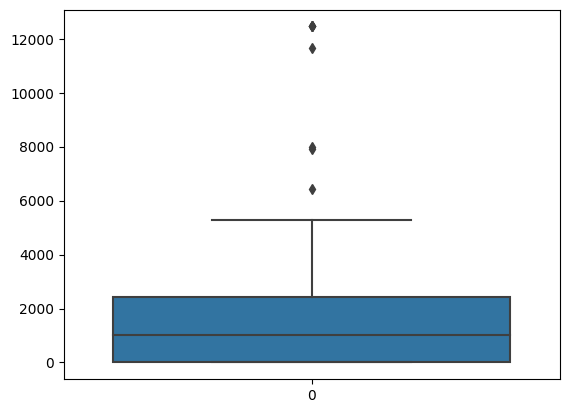

In [310]:
sns.boxplot(test_loan['CoapplicantIncome'])
plt.show()

<ipython-input-312-ceef77413f9a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_loan['LoanAmount'])


<Axes: xlabel='LoanAmount', ylabel='Density'>

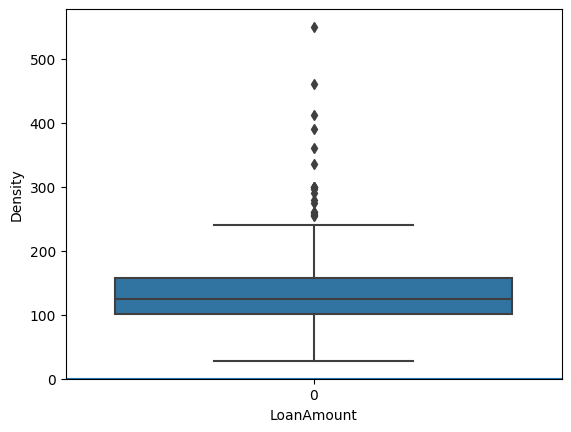

In [312]:
sns.distplot(test_loan['LoanAmount'])
sns.boxplot(test_loan['LoanAmount'])


In [314]:
upper_limit = test_loan['LoanAmount'].quantile(0.99)
lower_limit = test_loan['LoanAmount'].quantile(0.01)
print(upper_limit, lower_limit)

370.19999999999925 38.3


In [315]:
new_test_loan = test_loan[(test_loan['LoanAmount'] <= upper_limit) & (test_loan['LoanAmount'] >= lower_limit)]

<ipython-input-316-295f886402dd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_test_loan['LoanAmount'])


<Axes: xlabel='LoanAmount', ylabel='Density'>

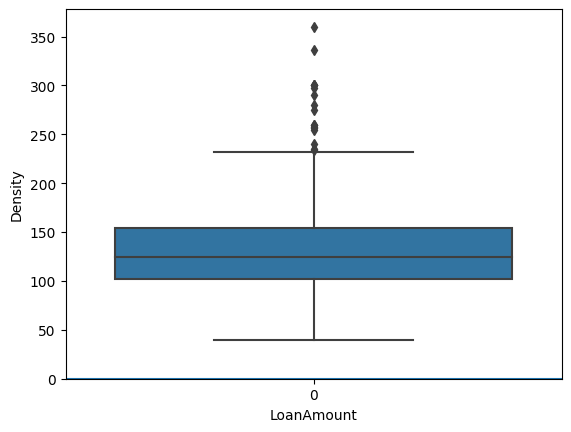

In [316]:
sns.distplot(new_test_loan['LoanAmount'])
sns.boxplot(new_test_loan['LoanAmount'])

In [317]:
test_loan['LoanAmount'] = np.where(test_loan['LoanAmount'] >= upper_limit,
        upper_limit,
        np.where(test_loan['LoanAmount'] <= lower_limit,
        lower_limit,test_loan['LoanAmount']))

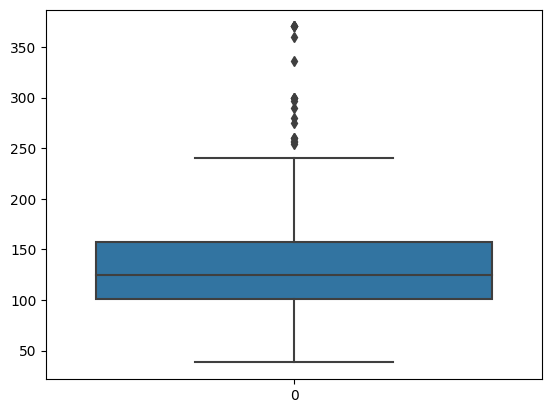

In [318]:
sns.boxplot(test_loan['LoanAmount'])
plt.show()

<ipython-input-319-5bee4b0040df>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_loan['Loan_Amount_Term'])


<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

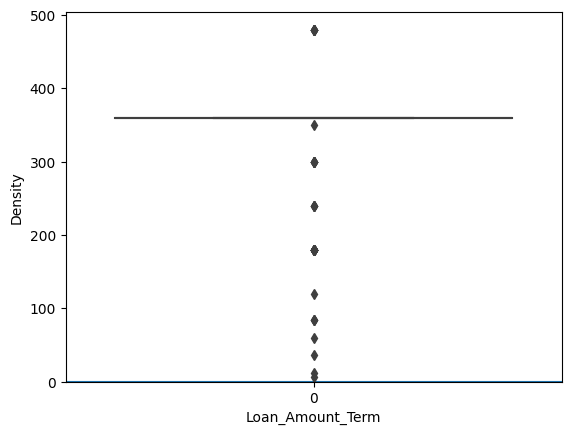

In [319]:
sns.distplot(test_loan['Loan_Amount_Term'])
sns.boxplot(test_loan['Loan_Amount_Term'])


In [320]:
upper_limit = test_loan['Loan_Amount_Term'].quantile(0.99)
lower_limit = test_loan['Loan_Amount_Term'].quantile(0.01)
print(upper_limit, lower_limit)

480.0 75.84


In [321]:
new_test_loan = test_loan[(test_loan['Loan_Amount_Term'] <= upper_limit) & (test_loan['Loan_Amount_Term'] >= lower_limit)]

<ipython-input-323-935480beb710>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_test_loan['Loan_Amount_Term'])


<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

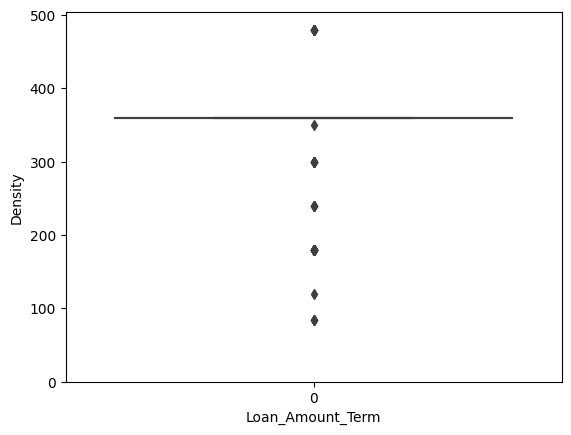

In [323]:
sns.distplot(new_test_loan['Loan_Amount_Term'])
sns.boxplot(new_test_loan['Loan_Amount_Term'])

In [324]:
test_loan['Loan_Amount_Term'] = np.where(test_loan['Loan_Amount_Term'] >= upper_limit,
        upper_limit,
        np.where(test_loan['Loan_Amount_Term'] <= lower_limit,
        lower_limit,test_loan['Loan_Amount_Term']))

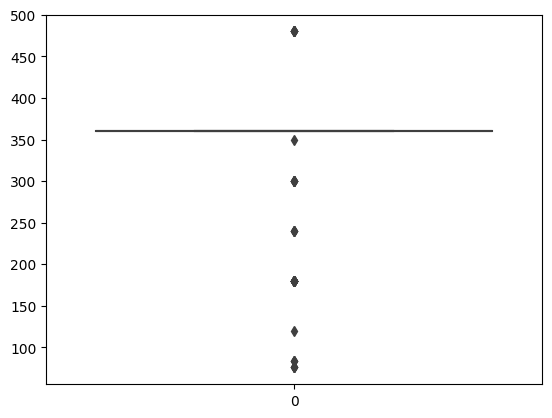

In [325]:
sns.boxplot(test_loan['Loan_Amount_Term'])
plt.show()